In [8]:
import Ab as ab
import datetime as dt
import pandas as pd
sd = dt.datetime(2015,1,1)
ed = dt.datetime(2023,5,5)


tqqq = ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ',sd,ed+dt.timedelta(days=1))

ffty = ab.StockData('FFTY')
ffty.get_data_from_yfinance('FFTY',sd,ed+dt.timedelta(days=1))

naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')

ticker = tqqq

#set max number of rows to display
pd.set_option('display.max_rows', 1000)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
test_start = dt.datetime(2016,1,22)
test_end =   dt.datetime(2023,5,5)


In [13]:
#buy and hold
bah = ab.BuyAndHold(ticker)
bah.run_strategy(ticker,test_start,test_end)
bah.trades

,Signal
Date,
2016-01-22,1
2023-03-14,-1



<Ab.StockData object at 0x7f5ce740f0d0>:
cumulative return      : 510.86%
compound anual return  : 29.5023%
max_drawdown           : -81.11%
sharp_ratio            : 4.53%
average of daily return: 0.1959%
std of daily return    : 4.3222%
number of trades       : 2,
trading days           : 2608,
batting Average        : 100.00%
Gain Average           : 510.86%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        
    Buy Date  Sell Date Ticker     Quant  Buy Price  Sell Price    Profit  \
0 2016-01-22 2023-03-14   TQQQ  0.268156   3.729167   22.780001  5.108603   

   Profit %  HoldingDays  LongTermProfit  ShortTermProfit  TaxCollectYear  \
0  5.108603         2608        5.108603              0.0            2024   

   TaxCollected  
0           0.0  


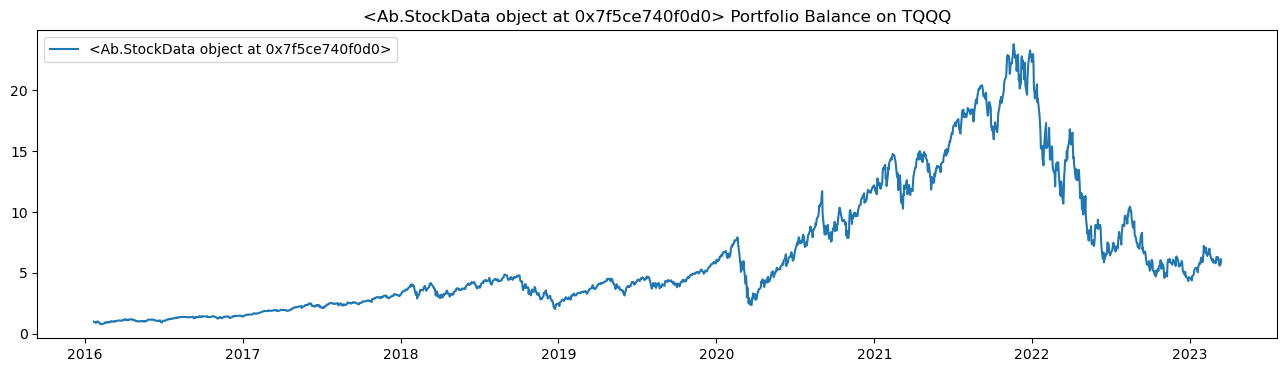

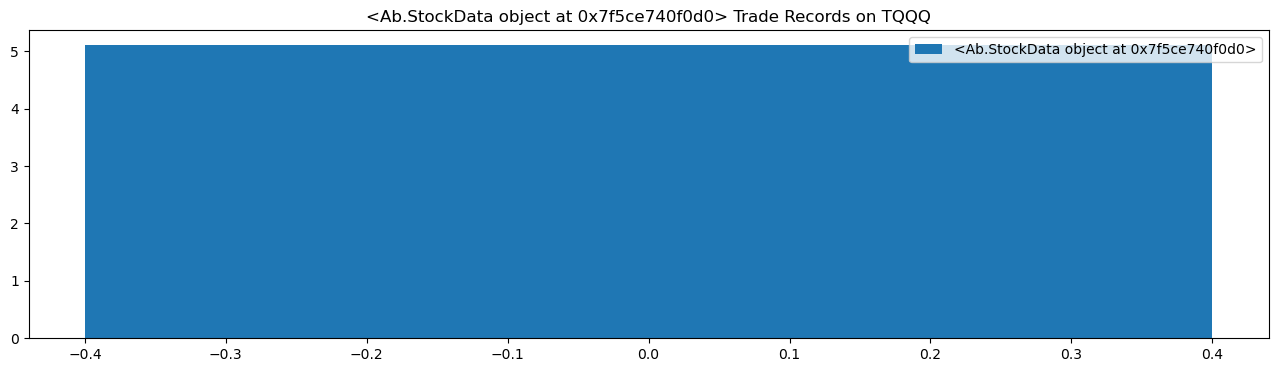

In [12]:
bah_bt = ab.BackTest()
bah_bt.run_backtest(bah,ticker,test_start,test_end)
bah_bt.plot_balance()
bah_bt.plot_records()
bah_bt.performance_summary()
print(bah_bt.trade_records)


fftynaa200r_stg:
cumulative return      : 1498.30%
compound anual return  : 48.5769%
max_drawdown           : -63.33%
sharp_ratio            : 6.25%
average of daily return: 0.2131%
std of daily return    : 3.4080%
number of trades       : 19,
trading days           : 2608,
batting Average        : 38.89%
Gain Average           : 121.48%
Loss Average           : -10.27%
Risk Reward Ratio      : 11.83
Gain STD               : 180.10%
Loss STD               : 5.65%
        
     Buy Date            Sell Date Ticker     Quant  Buy Price  Sell Price  \
0  2016-02-01  2016-02-02 00:00:00   TQQQ  0.264901   3.775000    3.535417   
1  2016-02-16  2018-10-24 00:00:00   TQQQ  0.283369   3.305000   12.230000   
2  2018-11-01  2018-11-12 00:00:00   TQQQ  0.254403  13.622500   12.227500   
3  2018-11-28  2018-12-04 00:00:00   TQQQ  0.248310  12.527500   11.857500   
4  2019-01-04  2020-03-09 00:00:00   TQQQ  0.307744   9.567500   15.307500   
5  2020-04-08  2021-12-01 00:00:00   TQQQ  0.345937  1

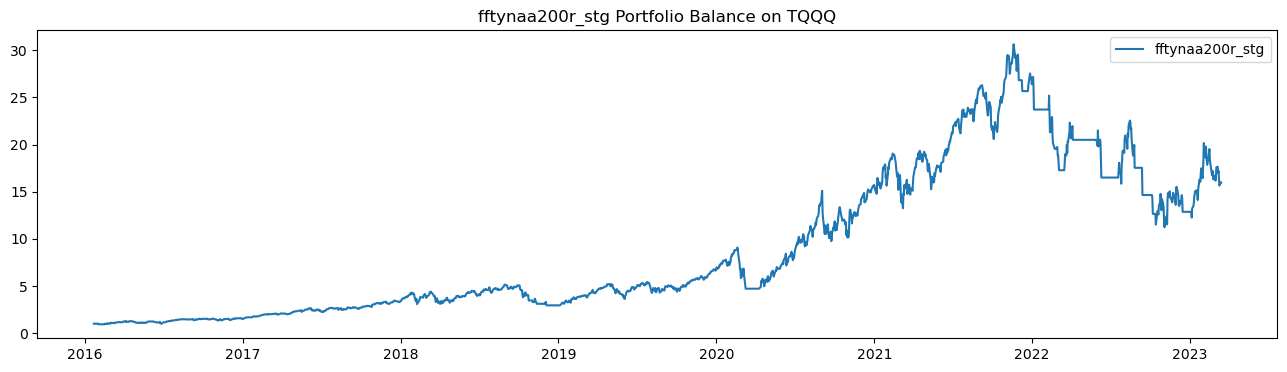

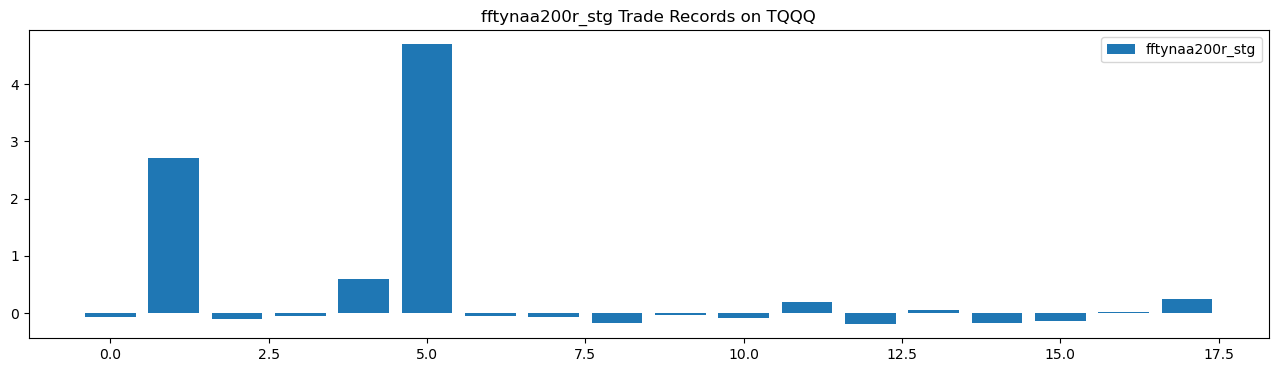

In [6]:
stg= ab.fftynaa200r_stg(naa200r_buy_threshold=15, naa200r_sell_threshold=30)
stg.run_strategy([ffty, naa200r],test_start, test_end)

stg_bt = ab.BackTest()
stg_bt.run_backtest(stg,ticker,test_start,test_end)

stg_bt.plot_balance()
stg_bt.plot_records()
stg_bt.performance_summary()
print(stg_bt.trade_records)

Index(['TQQQ', 'Weekday', 'Signal_x', 'BSignal', 'SSignal', 'Cash', 'Stock',
       'Total', 'Margin', 'Trade', 'Buy Price', 'Profit', 'FFTY',
       'FFTY-SMA200', 'FFTY_Signal', 'FFTY_TO_SMA200', 'NAA200R',
       'NAA200R-SMA20', 'NAA200R_Signal', 'Signal_y'],
      dtype='object')
Index(['FFTY', 'FFTY-SMA200', 'FFTY_Signal', 'FFTY_TO_SMA200', 'NAA200R',
       'NAA200R-SMA20', 'NAA200R_Signal', 'Signal'],
      dtype='object')


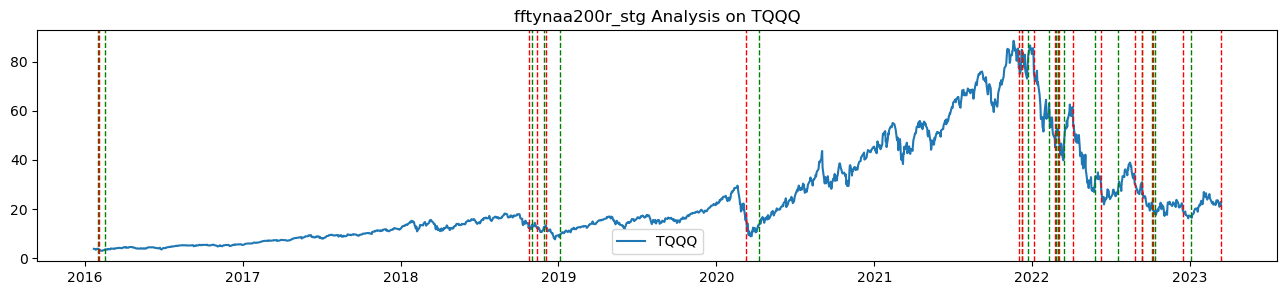

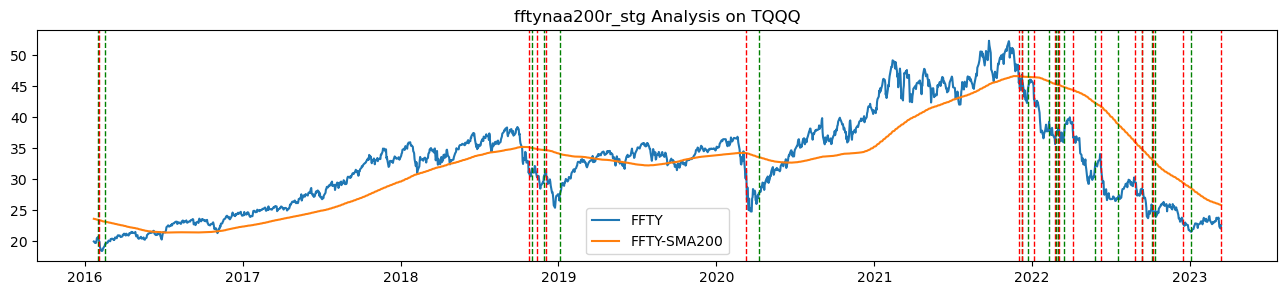

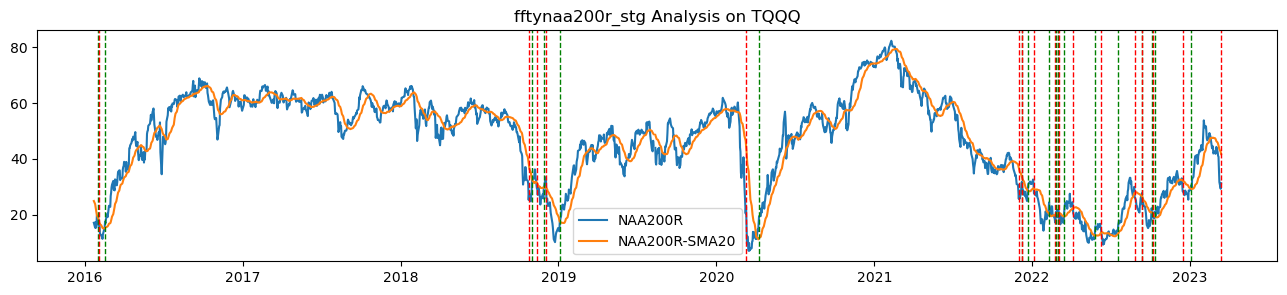

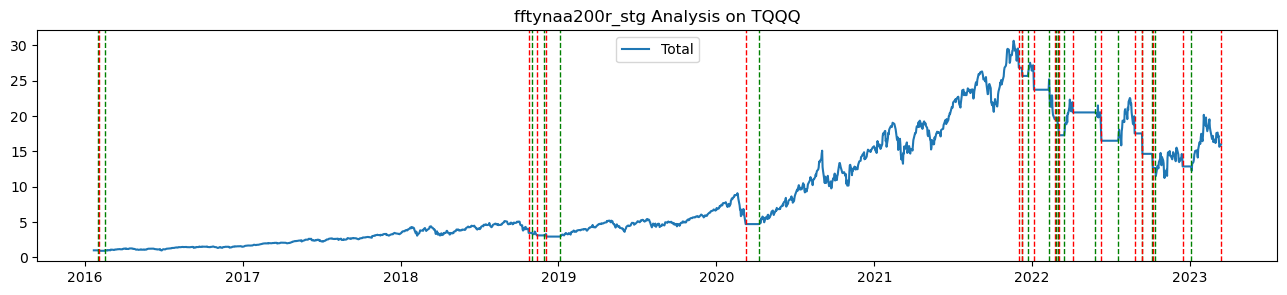

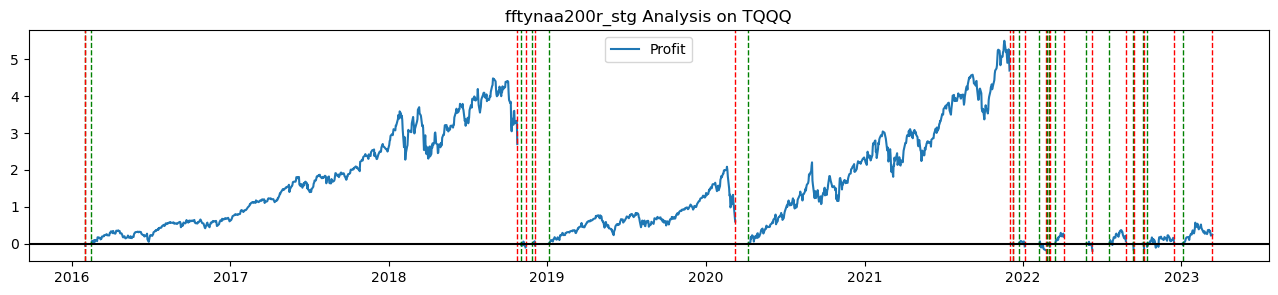

In [7]:
plot_start = dt.datetime(2016,1,12)
plot_end =   dt.datetime(2023,3,14)
print(stg_bt.joined_data.columns)
print(stg.joined_data.columns)
stg_bt.plot_joined_data([ticker.ticker], plot_start, plot_end)
stg_bt.plot_joined_data(['FFTY', 'FFTY-SMA200'], plot_start, plot_end)
stg_bt.plot_joined_data(['NAA200R', 'NAA200R-SMA20'], plot_start, plot_end)
stg_bt.plot_joined_data(['Total'], plot_start, plot_end)
stg_bt.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)
stg_bt.joined_data.to_csv('{}-{}.csv'.format(stg_bt.name, ticker.ticker))